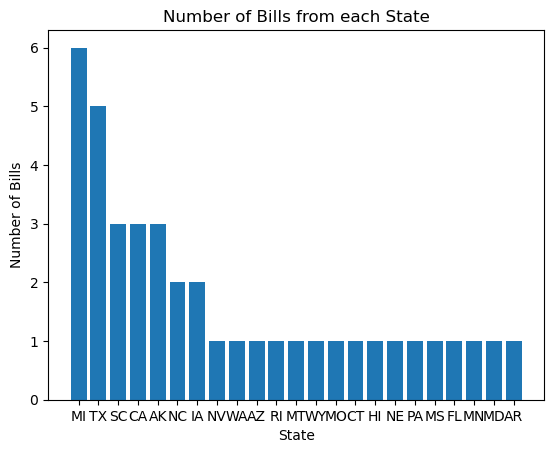

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import geopandas as gpd
import geoplot as gplt
import geoplot.crs as gcrs
import json
bills = pd.read_csv("bills_data.csv")
bills_per_state = bills["State"].value_counts()
bills_per_state_state_list = bills_per_state.index.tolist()
bills_per_state_count_list = bills_per_state.tolist()
plt.bar(bills_per_state_state_list, bills_per_state_count_list)
plt.title("Number of Bills from each State")
plt.xlabel("State")
plt.ylabel("Number of Bills")
plt.show()

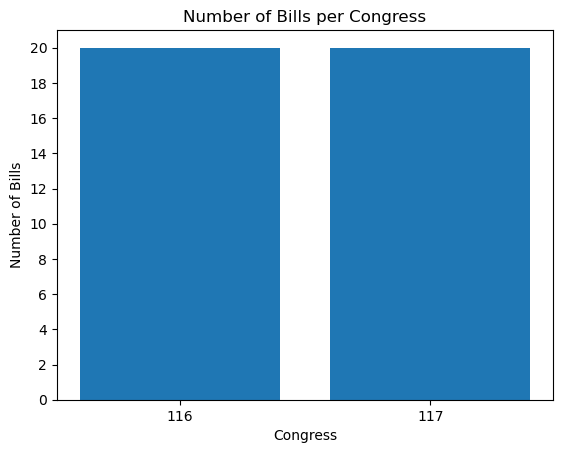

In [2]:
bills_per_congress = bills["Congress"].value_counts()
bills_per_congress_congress_list = bills_per_congress.index.tolist()
bills_per_congress_count_list = bills_per_congress.tolist()
plt.bar(bills_per_congress_congress_list, bills_per_congress_count_list)
plt.title("Number of Bills per Congress")
plt.xlabel("Congress")
plt.ylabel("Number of Bills")
plt.locator_params(axis='x', nbins=len(bills_per_congress_congress_list))
plt.locator_params(axis='y', nbins=max(bills_per_congress_count_list))
plt.show()

In [3]:
states_and_policy_areas = bills[["State","Policy Areas"]]
state_policy_dict = {}
for state in states_and_policy_areas["State"].tolist(): 
    state_policy_dict[state] = states_and_policy_areas[states_and_policy_areas["State"]==state]["Policy Areas"].tolist()
print(state_policy_dict)


{'MO': ['Congress'], 'NE': ['Finance and Financial Sector'], 'MD': ['International Affairs'], 'SC': ['Finance and Financial Sector', 'Crime and Law Enforcement', 'Education'], 'MN': ['Congress'], 'MI': ['Emergency Management', 'Transportation and Public Works', 'Armed Forces and National Security', 'Government Operations and Politics', 'Science, Technology, Communications', 'Public Lands and Natural Resources'], 'CA': ['Public Lands and Natural Resources', 'Immigration', 'Native Americans'], 'FL': ['Emergency Management'], 'MS': ['Public Lands and Natural Resources'], 'PA': ['Government Operations and Politics'], 'TX': ['Crime and Law Enforcement', 'Crime and Law Enforcement', 'Crime and Law Enforcement', 'Government Operations and Politics', 'Crime and Law Enforcement'], 'NC': ['Families', 'Civil Rights and Liberties, Minority Issues'], 'HI': ['Native Americans'], 'CT': ['Agriculture and Food'], 'NV': ['Agriculture and Food'], 'AK': ['Native Americans', 'Government Operations and Poli

In [4]:
# adding a second of the same type to MO to test
# state_policy_dict['MO'].append('Congress')
# print(state_policy_dict)
subject_list = ["Agriculture and Food", "Animals", "Armed Forces and National Security", "Arts, Culture, Religion", "Civil Rights and Liberties, Minority Issues", "Commerce", "Congress", "Crime and Law Enforcement", "Economics and Public Finance", "Education", "Emergency Management", "Energy", "Environmental Protection", "Families", "Finance and Financial Sector", "Foreign Trade and International Finance", "Government Operations and Politics", "Health", "Housing and Community Development", "Immigration", "International Affairs", "Labor and Employment", "Law", "Native Americans", "Public Lands and Natural Resources", "Science, Technology, Communications", "Social Sciences and History", "Social Welfare", "Sports and Recreation", "Taxation", "Transportation and Public Works", "Water Resources Development"]
state_subject_dict = {}
for state in state_policy_dict:
    state_subject_dict[state] = {}
    for subject in subject_list:
        state_subject_dict[state][subject] = state_policy_dict[state].count(subject)
print(state_subject_dict)
#Attempting to resolve problem


{'MO': {'Agriculture and Food': 0, 'Animals': 0, 'Armed Forces and National Security': 0, 'Arts, Culture, Religion': 0, 'Civil Rights and Liberties, Minority Issues': 0, 'Commerce': 0, 'Congress': 1, 'Crime and Law Enforcement': 0, 'Economics and Public Finance': 0, 'Education': 0, 'Emergency Management': 0, 'Energy': 0, 'Environmental Protection': 0, 'Families': 0, 'Finance and Financial Sector': 0, 'Foreign Trade and International Finance': 0, 'Government Operations and Politics': 0, 'Health': 0, 'Housing and Community Development': 0, 'Immigration': 0, 'International Affairs': 0, 'Labor and Employment': 0, 'Law': 0, 'Native Americans': 0, 'Public Lands and Natural Resources': 0, 'Science, Technology, Communications': 0, 'Social Sciences and History': 0, 'Social Welfare': 0, 'Sports and Recreation': 0, 'Taxation': 0, 'Transportation and Public Works': 0, 'Water Resources Development': 0}, 'NE': {'Agriculture and Food': 0, 'Animals': 0, 'Armed Forces and National Security': 0, 'Arts, 

In [5]:
most_common_policy_area = {}
for state in state_subject_dict:
    most_common_policy_area[state] = max(state_subject_dict[state], key = state_subject_dict[state].get)
print(most_common_policy_area)

{'MO': 'Congress', 'NE': 'Finance and Financial Sector', 'MD': 'International Affairs', 'SC': 'Crime and Law Enforcement', 'MN': 'Congress', 'MI': 'Armed Forces and National Security', 'CA': 'Immigration', 'FL': 'Emergency Management', 'MS': 'Public Lands and Natural Resources', 'PA': 'Government Operations and Politics', 'TX': 'Crime and Law Enforcement', 'NC': 'Civil Rights and Liberties, Minority Issues', 'HI': 'Native Americans', 'CT': 'Agriculture and Food', 'NV': 'Agriculture and Food', 'AK': 'Armed Forces and National Security', 'WY': 'Health', 'MT': 'Armed Forces and National Security', 'IA': 'Crime and Law Enforcement', 'RI': 'Health', 'AZ': 'Native Americans', 'WA': 'Native Americans', 'AR': 'Public Lands and Natural Resources'}


In [6]:
bills_per_state_dict = bills_per_state.to_dict()
type(bills_per_state_dict)

dict

In [7]:
from maps import get_map_data
from maps import add_map_data
map_data_dict = get_map_data()
new_map_data_dict = add_map_data(map_data_dict,bills_per_state_dict,most_common_policy_area)
new_map_data_geoframe = gpd.GeoDataFrame.from_features(new_map_data_dict["features"])
new_map_data_geoframe.set_geometry("geometry")

,geometry,state,adm1_code,population,bill count,policy area
0,"POLYGON ((-89.59941 48.01027, -89.48888 48.013...",MN,USA-3514,5303925,1,Congress
1,"POLYGON ((-111.19419 44.56116, -111.29155 44.7...",MT,USA-3515,989415,1,Armed Forces and National Security
2,"POLYGON ((-96.60136 46.35136, -96.53891 46.199...",ND,USA-3516,672591,0,
3,"POLYGON ((-111.04973 44.48816, -111.05025 42.0...",ID,USA-3518,1567582,0,
4,"POLYGON ((-116.99807 46.33017, -116.90653 46.1...",WA,USA-3519,6724540,1,Native Americans
5,"POLYGON ((-109.04523 36.99991, -109.04367 31.3...",AZ,USA-3520,6392017,1,Native Americans
6,"POLYGON ((-114.35490 34.46467, -114.16597 34.2...",CA,USA-3521,37253956,3,Immigration
7,"POLYGON ((-102.05017 40.00082, -102.04012 38.4...",CO,USA-3522,5029196,0,
8,"POLYGON ((-114.03053 36.99410, -114.02363 36.1...",NV,USA-3523,2700551,1,Agriculture and Food
9,"POLYGON ((-103.00161 33.87995, -103.00161 31.9...",NM,USA-3524,2059179,0,


<AxesSubplot:>

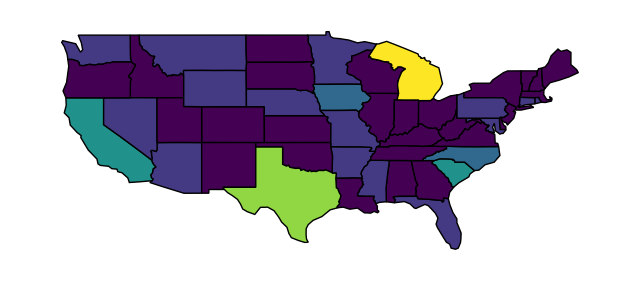

In [8]:
gplt.choropleth(new_map_data_geoframe, hue="bill count")